### The data is temperature and salinity from HYCOM ensemble in the region of Gulf of Mexico.
### Depth: 10m 
### Date: 2010_121_12h

In [3]:
import netCDF4

In [4]:
import numpy as np

In [5]:
f=netCDF4.Dataset('/Users/Star/Desktop/PC_stuff/GOM_ensemble/001/archm.2010_121_12.cdf')

In [6]:
print(f.variables.keys())

odict_keys(['lon', 'lat', 'depth', 'time', 'MONTG', 'SSH', 'UBAVG', 'VBAVG', 'UT', 'VT', 'DP', 'TEM', 'SAL'])


## get temperature array ##

In [7]:
temp=f.variables['TEM']

In [8]:
temp.dimensions

('time', 'depth', 'lat', 'lon')

## get salinity array

In [9]:
sali=f.variables['SAL']

In [10]:
sali.dimensions

('time', 'depth', 'lat', 'lon')

In [11]:
print(sali)

<class 'netCDF4._netCDF4.Variable'>
float32 SAL(time, depth, lat, lon)
    missing_value: -9999.0
    units: psu
    long_name: salin
unlimited dimensions: time
current shape = (1, 20, 385, 541)
filling off



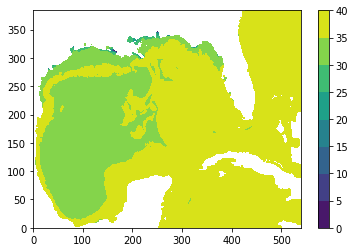

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
sali_ct = plt.contourf(sali[0,10,:,:])
bar=plt.colorbar(sali_ct)

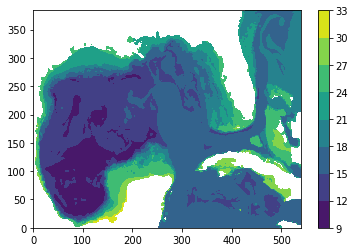

In [13]:
temp_ct=plt.contourf(temp[0,10,:,:])
bar=plt.colorbar(temp_ct)

In [14]:
print(temp)

<class 'netCDF4._netCDF4.Variable'>
float32 TEM(time, depth, lat, lon)
    missing_value: -9999.0
    units: degrees Celsius
    long_name: temp
unlimited dimensions: time
current shape = (1, 20, 385, 541)
filling off



In [15]:
import matplotlib as mpl
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math, Latex
from numpy.random import rand
from pylab import rcParams, pcolor, show,colorbar, xticks, yticks, title, figure
from IPython.display import Image

In [43]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
rcParams['figure.figsize'] = (11, 6.5)

def fig5():
    fig,ax=plt.subplots(1,1)
    ax.plot(x,y,'.')
    ax.set_xlabel('Temp (Celsius)');ax.set_ylabel('Salinity (psu)')

## unfold 2-D array to 1-D, pick 3 latitudes and all the longitudes along with them, and then draw scatter plot

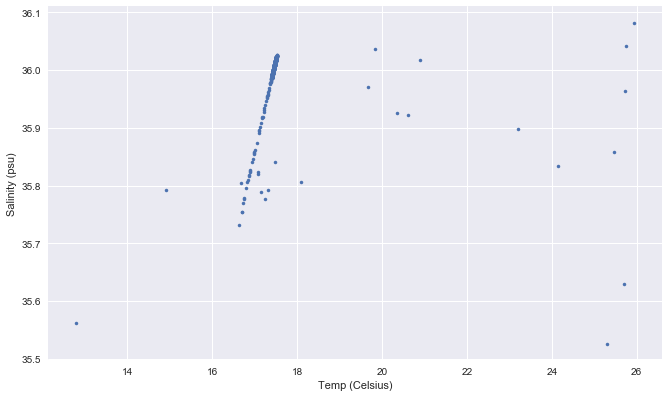

In [197]:
x=np.ma.concatenate([temp[0,10,0,:],temp[0,10,1,:]])
y=np.ma.concatenate([sali[0,10,0,:],sali[0,10,1,:]])
n=2
for n in range(2,3):
    x=np.ma.concatenate([x,temp[0,10,n,:]])
    y=np.ma.concatenate([y,sali[0,10,n,:]])
    
fig5()

In [198]:
x = [s for s in x if s > -9999]
print(len(x))
y = [s for s in y if s > -9999]
print(len(y))

752
752


## get histogram for temp/salinity

Text(0.5,1,'Temperature histogram, # of bins = 40')

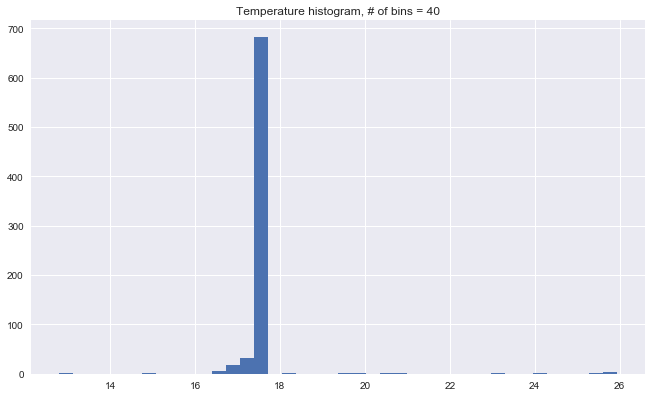

In [192]:
temp_hist=plt.hist(x,40)
plt.title('Temperature histogram, # of bins = 40')

Text(0.5,1,'Salinity histogram, # of bins = 40')

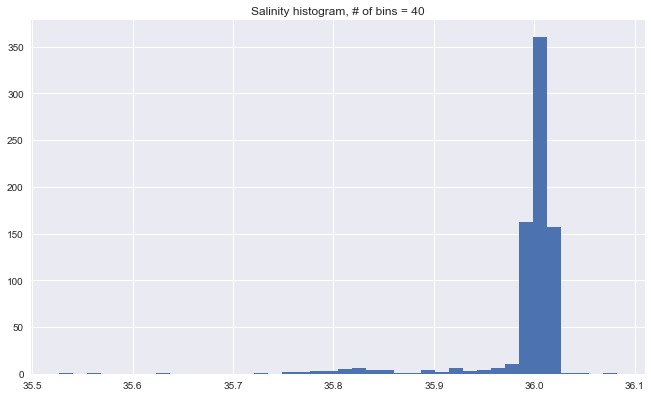

In [188]:
sali_hist=plt.hist(y,40)
plt.title('Salinity histogram, # of bins = 40')

In [195]:
from numpy import sqrt, pi, exp

def getKdeGaussianAni(data,totalframes=100, showpts=True):
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    if showpts:
        junk = plot(data,ones_like(data)*0.1,'go')

    
    numpts = 10000
    x = linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,
    
    def gaussian(x,sigma,mu):
        # Why isn't this defined somewhere?! It must be!
        return (1/sqrt(2*pi*sigma**2)) *  exp(-((x-mu)**2)/(2*sigma**2))
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = gaussian(linspace(-3,3,kernelpts),1,0)
        #kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
            
        # y /= kernelwidth # Area under the kernel does not vary linearly with its width 
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
        line.set_data(x,y)
# Normalize the y axis for the data range
        ax.set_ylim(min(0,y.min()),1.1*y.max())
        #title('ymin %s ymax %s'%(y.min(),y.max()))

    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani

## use Gaussian kernal to fit the distributions

Text(0.5,1,'Temperature distribution fit, bw=0.2')

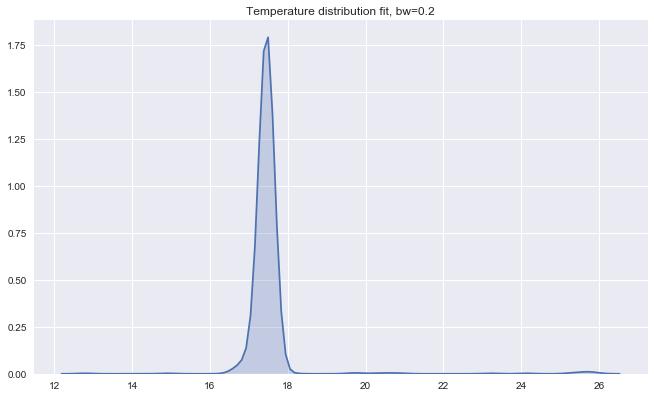

In [199]:
ax = sns.kdeplot(x, shade=True, bw=0.2,color="b")
plt.title("Temperature distribution fit, bw=0.2")

Text(0.5,1,'Salinity distribution fit, bw=0.006')

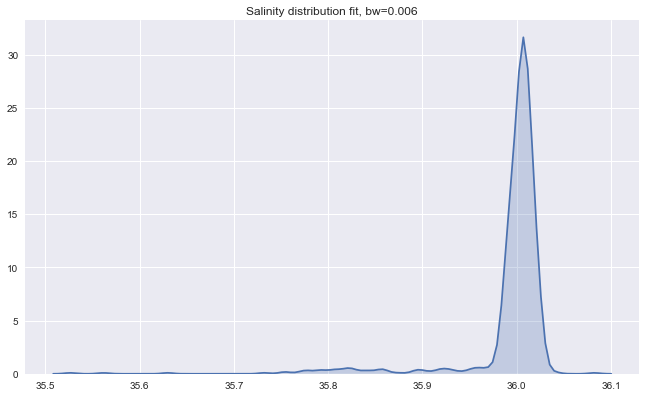

In [200]:
ax = sns.kdeplot(y, shade=True, bw=0.006,color="b")
plt.title("Salinity distribution fit, bw=0.006")